# Veri Yükleme

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
!ls "/gdrive/MyDrive/Calisma_ortami/eksik_veriler.csv"

/gdrive/MyDrive/Calisma_ortami/eksik_veriler.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataFrame = pd.read_csv("/gdrive/MyDrive/Calisma_ortami/eksik_veriler.csv")

In [ ]:
dataFrame

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10.0,e
1,tr,125,36,11.0,e
2,tr,135,34,10.0,k
3,tr,133,30,9.0,k
4,tr,129,38,12.0,e
5,tr,180,90,30.0,e
6,tr,190,80,25.0,e
7,tr,175,90,35.0,e
8,tr,177,60,22.0,k
9,us,185,105,33.0,e


In [ ]:
dataFrame.mean()

<ipython-input-6-5588d40ea680>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.mean()


boy     163.363636
kilo     62.136364
yas      28.450000
dtype: float64

## DATASET ' te Boş Veri Var Mı?

`DF.isnull() ` boolean değer döndürür True/ False.
`DF.isnull() ` iyi gibi gözüksede milyonlarca veri olcağından datasette çok okunaklı olmayacaktır.

`DF.isnull().sum() ` null değerlerin her bir kolon için toplam sayısını döndürür.

In [ ]:
dataFrame.isnull()

,ulke,boy,kilo,yas,cinsiyet
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [ ]:
dataFrame.isnull().sum()

ulke        0
boy         0
kilo        0
yas         2
cinsiyet    0
dtype: int64

## NAN Gelen Veriye Değer Atama

`from sklearn.impute import SimpleImputer` fonksiyonu çağrılır.
`SimpleImputer(missing_values=np.nan, strategy="mean")` NaN değere ile`strategy="mean"`kolonun ortalama değeri atanır.


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

In [ ]:
Yas= dataFrame.iloc[:, 1:4].values
Yas[:,1:4]

array([[ 30.,  10.],
       [ 36.,  11.],
       [ 34.,  10.],
       [ 30.,   9.],
       [ 38.,  12.],
       [ 90.,  30.],
       [ 80.,  25.],
       [ 90.,  35.],
       [ 60.,  22.],
       [105.,  33.],
       [ 55.,  27.],
       [ 50.,  44.],
       [ 58.,  nan],
       [ 59.,  41.],
       [ 62.,  55.],
       [ 70.,  47.],
       [ 90.,  nan],
       [ 80.,  27.],
       [ 88.,  28.],
       [ 40.,  29.],
       [ 66.,  32.],
       [ 56.,  42.]])

In [ ]:
imputer = imputer.fit(Yas[:, 1:4])
Yas[:, 1:4] = imputer.transform(Yas[:, 1:4])
yasDF= pd.DataFrame(Yas, columns= ["BOY", "KİLO", "YAS"])
yasDF

,BOY,KİLO,YAS
0,130.0,30.0,10.00
1,125.0,36.0,11.00
2,135.0,34.0,10.00
3,133.0,30.0,9.00
4,129.0,38.0,12.00
5,180.0,90.0,30.00
6,190.0,80.0,25.00
7,175.0,90.0,35.00
8,177.0,60.0,22.00
9,185.0,105.0,33.00


# Kategorik Verinin Numerik Veriye Dönüşmesi ve Dummy Variable Trap (Kukla Değişken Tuzağı)

Kategorik verilerin numerik verilere dönüşümünde özellikle OneHotEncoder gibi bir fonksiyondan faydalanacaksak burda karşımıza aynı verilerin çoklanması sorunu ortaya çıkar. Bu da demek oluyorki dataframede aynı ifdeyi farklı şekilllerde anlatan birde fazla ifade mevcutur. Bu duruma kukla veri ya da dummy variable trap denilir. Bu gibi durumlarda sonuca etki yapacağından istenmeyen durum olarak bilinir ve bu gibi durumların ortadan kaldırılması gerekir. Örneğin orjinal veri dataframeden silinebilir.

Dikkat edilmesi gereken bir nokta şudur:

aşağıda labelencoder örneği onehorencoder ile yapılmış olsaydı iki adet aynı veri oluşacaktır. Hem erkek "0" hem de kadın "1" için farklı sutünlar oluşacak ve aynı şeyi farklı şekilde ifade eden iki sonuç meydana gelecekti.
Burda orjinal sütunu sildiğimiz gibi kadın ya da erkekten de birini silmeliyiz.

Ancak aşağıdaki onehotencoder örneğinde bu şekilde bir durum söz konusu değil. Çünkü TR, USA, FR sütunları farklı bilgileri içermekte. Burada yapacağımız sadece orjinal sütunun kaldırmak olacaktır.




## Tekli Boolean Değerlerin 0 - 1 Dönüşümü

`from sklearn import preprocessing`
`labelEncoding = preprocessing.LabelEncoder()` veriyi binarye dönüştürür.

`.fit_transform()` diziye çevirdi.

In [ ]:
cinsiyet = dataFrame.iloc[:, 3:-1].values
from sklearn import preprocessing
labelEncoding = preprocessing.LabelEncoder()
cinsiyet[:, -1] = labelEncoding.fit_transform(dataFrame.iloc[:, -1])
cinsiyet

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]])

## Çoklu Boolean Değerlerin 0 - 1 Dönüşümü


`from sklearn import preprocessing`
`oneHotEncoding =preprocessing.OneHotEncoder()`

Burada type "OneHotEncoder" olarak kalmaması için;

`oneHotEncoding.fit_transform(-).toarray()`
çıktıyı diziye çeviriyoruz.

In [ ]:
ulke = dataFrame.iloc[:,0:1].values
oneHotEncoding =preprocessing.OneHotEncoder()
ulke= oneHotEncoding.fit_transform(ulke).toarray()
ulke

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
ulkeDF= pd.DataFrame(ulke, columns= ["TR","USA","FR"])
#ulkeDF= pd.DataFrame(data= ulke, index= range(22), columns= ["TR","USA","FR"])
ulkeDF

,TR,USA,FR
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0



# İki yada Daha Fazla DataFrame Birleştirme (Concat)

dataframeleri birleştirmeye yarar.

format:  `pd.concat([FD1, FD2], axis=1)`

In [ ]:
sonucDF = pd.concat([ulkeDF, yasDF], axis=1)

In [ ]:
sonucDF["CINSIYET"] = cinsiyet

In [ ]:
sonucDF

,TR,USA,FR,BOY,KİLO,YAS,CINSIYET
0,0.0,1.0,0.0,130.0,30.0,10.00,0.0
1,0.0,1.0,0.0,125.0,36.0,11.00,0.0
2,0.0,1.0,0.0,135.0,34.0,10.00,1.0
3,0.0,1.0,0.0,133.0,30.0,9.00,1.0
4,0.0,1.0,0.0,129.0,38.0,12.00,0.0
5,0.0,1.0,0.0,180.0,90.0,30.00,0.0
6,0.0,1.0,0.0,190.0,80.0,25.00,0.0
7,0.0,1.0,0.0,175.0,90.0,35.00,0.0
8,0.0,1.0,0.0,177.0,60.0,22.00,1.0
9,0.0,0.0,1.0,185.0,105.0,33.00,0.0



# Veriyi Bölme

`sklearn.model_selection` modülü kullanılarak

orjinal datayı train ve test olarak böleriz.

Bu işlemi `train_test_slit` fonsiyonunu import ederek gerçekleştiririz.




In [ ]:
from sklearn.model_selection import train_test_split

### Veriyi Dikey Eksende Bağımlı ve Bağımsız Değişken Olarak Ayırma


`x=dataFrame.drop("DeğişkenAdi", axis=1).values`
`y=dataFrame["DeğişkenAdi"].values`

Burada x bağımsız değişkenlerin olduğu DF' leri ifade ederken, y ise bağımlı değişkeni ifade eder.



In [ ]:
x= sonucDF.drop(["CINSIYET"], axis=1).values
y= sonucDF["CINSIYET"].values

### Veriyi Yatay Eksende Train ve Test Datası Olarak Ayırma


`x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=15)`

test size ile train ve test datasına bir oran vermiş oluruz, random_state her seferinde aynı bölünmüş verileri kullanmamıza yarayacaktır. random_state için atanan değerler keyfi seçilebilir.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=0 )

In [ ]:
x_train


array([[  0.  ,   1.  ,   0.  , 177.  ,  60.  ,  22.  ],
       [  0.  ,   1.  ,   0.  , 190.  ,  80.  ,  25.  ],
       [  1.  ,   0.  ,   0.  , 193.  ,  90.  ,  28.45],
       [  0.  ,   1.  ,   0.  , 129.  ,  38.  ,  12.  ],
       [  0.  ,   1.  ,   0.  , 135.  ,  34.  ,  10.  ],
       [  0.  ,   1.  ,   0.  , 180.  ,  90.  ,  30.  ],
       [  1.  ,   0.  ,   0.  , 187.  ,  80.  ,  27.  ],
       [  0.  ,   0.  ,   1.  , 185.  , 105.  ,  33.  ],
       [  0.  ,   1.  ,   0.  , 175.  ,  90.  ,  35.  ],
       [  1.  ,   0.  ,   0.  , 183.  ,  88.  ,  28.  ],
       [  0.  ,   1.  ,   0.  , 133.  ,  30.  ,   9.  ],
       [  0.  ,   1.  ,   0.  , 130.  ,  30.  ,  10.  ],
       [  1.  ,   0.  ,   0.  , 174.  ,  70.  ,  47.  ],
       [  0.  ,   0.  ,   1.  , 160.  ,  58.  ,  28.45]])

In [ ]:
x_test


array([[  1.,   0.,   0., 164.,  66.,  32.],
       [  0.,   0.,   1., 165.,  55.,  27.],
       [  0.,   0.,   1., 167.,  62.,  55.],
       [  0.,   0.,   1., 162.,  59.,  41.],
       [  0.,   1.,   0., 125.,  36.,  11.],
       [  1.,   0.,   0., 166.,  56.,  42.],
       [  0.,   0.,   1., 155.,  50.,  44.],
       [  1.,   0.,   0., 159.,  40.,  29.]])

In [ ]:
y_train


array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])

In [ ]:
y_test

array([1., 1., 1., 1., 0., 1., 1., 1.])

## Veri Ölçekleme

`from sklearn.preprocessing import StandardScaler`

Burada x_train ve x_test verisetleri ölçeklendirilmiş oldu

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()

In [ ]:
x_train= scaler.fit_transform(x_train)

In [ ]:
x_test= scaler.fit_transform(x_test)

## Modeli Eğitme

Yukarda `train_test_split(x, y, test_size=0.33) ` ile verinin %69' luk kısmını eğitim datasına ayırdık.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model= LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()


## Tahminleme

Yukarda `train_test_split(x, y, test_size=0.33) ` ile verinin %33' lük kısmını test datasına ayırdık.

In [ ]:
y_predict =  model.predict(x_test)
y_predict

array([-0.74926489,  0.70916066,  0.22878799,  0.2664621 ,  0.13000573,
        0.06559212,  0.64507487,  0.9898957 ])

In [ ]:
y_test

array([1., 1., 1., 1., 0., 1., 1., 1.])


# DataSet İncelemesi



### describe()

verileri `describe()` ile yorumlayabiliriz.


In [ ]:
dataFrame.describe()

,boy,kilo,yas
count,22.000000,22.000000,20.000000
mean,163.363636,62.136364,28.450000
std,21.077059,22.286651,13.382923
min,125.000000,30.000000,9.000000
25%,156.000000,42.500000,19.500000
50%,165.500000,59.500000,28.500000
75%,179.250000,80.000000,36.500000
max,193.000000,105.000000,55.000000


### corr()

Verilerin `corr()` ile korelasyonu bulabiliriz.
Korelasyonda birbiri ile ilişkili bulunan değerler 1 ' ne kadar yakında o kadar iyi ilişiki var demektir.

In [ ]:
dataFrame.corr()

<ipython-input-38-6bf2272b98ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()


,boy,kilo,yas
boy,1.000000,0.899177,0.58368
kilo,0.899177,1.000000,0.48414
yas,0.583680,0.484140,1.00000


### groupby()

groupby() ile verileri gruplarız.

In [ ]:
sonucDF.groupby("CINSIYET").mean()["BOY"]

CINSIYET
0.0    168.272727
1.0    158.454545
Name: BOY, dtype: float64

In [ ]:
import seaborn as sbn

<Figure size 700x500 with 0 Axes>

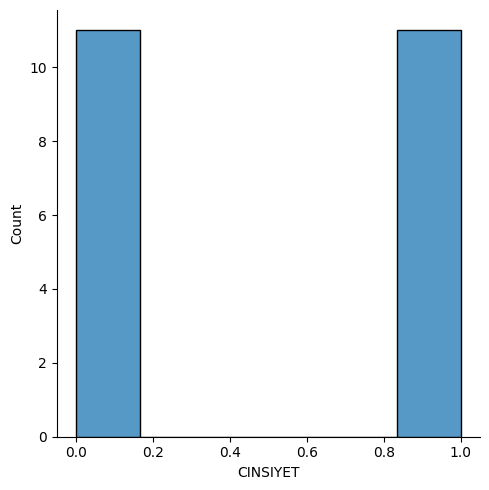

In [ ]:
plt.figure(figsize=[7,5])
sbn.displot(data=sonucDF["CINSIYET"])

<Axes: >

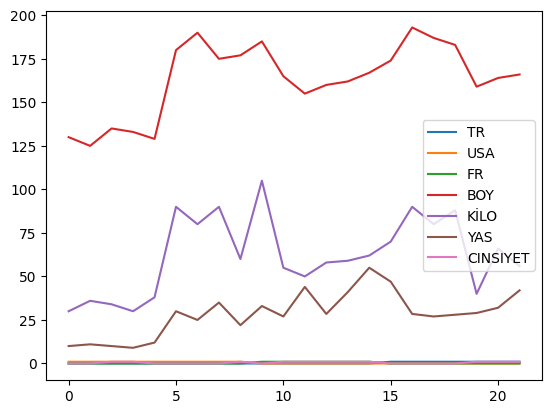

In [ ]:
sonucDF.plot()